Loading the data, fixing the formatting of the data and adding headers and converting the text file into a dataframe.

In [8]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file = open("/content/sample_data/spambase.data", "r")

file_data=file.read()
file.close()

if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

TESTDATA = StringIO(file_data)
df = pd.read_csv(TESTDATA,header=0,index_col=False)


Data Exploration

In [2]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Correlation matrix gives us an idea of how all the variables are related to each other from 1 being most related to -1 being least related

In [5]:
corr_matrix = df.corr()
corr_matrix['spam']

word_freq_make                0.126208
word_freq_address            -0.030224
word_freq_all                 0.196988
word_freq_3d                  0.057371
word_freq_our                 0.241920
word_freq_over                0.232604
word_freq_remove              0.332117
word_freq_internet            0.206808
word_freq_order               0.231551
word_freq_mail                0.138962
word_freq_receive             0.234529
word_freq_will                0.007741
word_freq_people              0.132927
word_freq_report              0.060027
word_freq_addresses           0.195902
 word_freq_free               0.263215
word_freq_business            0.263204
word_freq_email               0.204208
word_freq_you                 0.273651
word_freq_credit              0.189761
word_freq_your                0.383234
word_freq_font                0.091860
word_freq_000                 0.334787
word_freq_money               0.216111
word_freq_hp                 -0.256723
word_freq_hpl            

As we have 57 features the most related and most unrelated 2 features are derived here.

In [6]:
print('Few of the most corelated columns based on the matrix above is')
print('word_freq_your = 0.383234')
print('word_freq_remove = .332117')
print('word_freq_000 = 0.334787')
print('char_freq_$ = 0.323629')

most corelated colmsn based on the matrix above is
word_freq_your = 0.383234
word_freq_remove = .332117
word_freq_000 = 0.334787
char_freq_$ = 0.323629


In [7]:
print('most non corelated colmsn based on the matrix above is')
print('word_freq_hp = -0.256723')
print('word_freq_hpl = -0.232968')
print('word_freq_george = -0.183404')


most non corelated colmsn based on the matrix above is
word_freq_hp = -0.256723
word_freq_hpl = -0.232968
word_freq_george = -0.183404


In [ ]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(df)
plt.show()

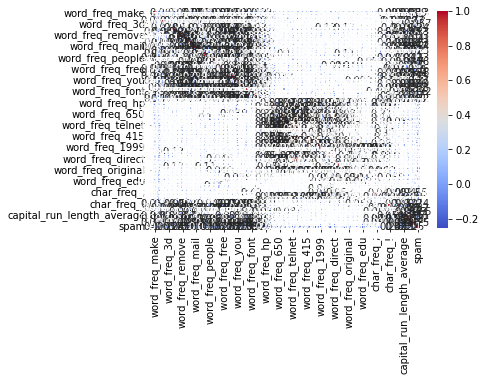

In [ ]:
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

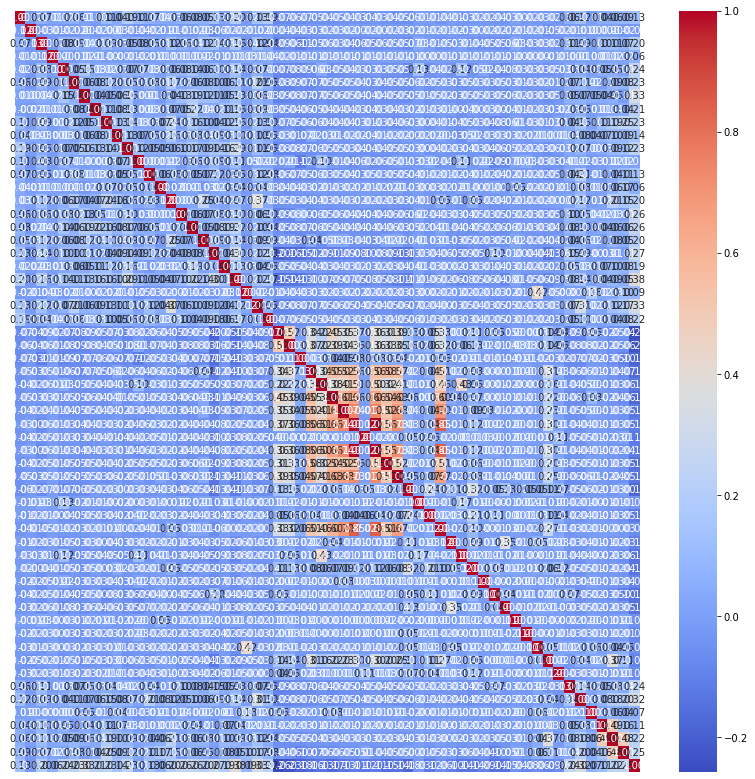

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f",xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
# threshold = 0.5
# corr_matrix_filtered = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# corr_matrix_filtered = corr_matrix_filtered[corr_matrix_filtered.abs() > threshold]

# sns.heatmap(corr_matrix_filtered, cmap="coolwarm", annot=True, fmt=".2f")

In [9]:
import plotly.express as px
corr_matrix = df.corr()

# Reshape correlation matrix to a long-form dataframe
corr_df = pd.melt(corr_matrix.reset_index(), id_vars='index')

# Create interactive heatmap using plotly
fig = px.imshow(corr_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu_r',
                zmin=-1,
                zmax=1)
fig.update_layout(width=800, height=800)
fig.show()

In [ ]:
# columns=df.keys()
# for i in columns:
#   sns.histplot(data=df, x=i, hue="spam", kde=True)
#   plt.show()

In [ ]:
# for i in columns:
#   sns.boxplot(x="spam", y=i, data=df)
#   plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

X = df.drop("spam", axis=1)
y = df["spam"]

rf.fit(X, y)

importances = rf.feature_importances_
importances

array([0.0033175 , 0.00569142, 0.01284716, 0.00084704, 0.03316931,
       0.0083256 , 0.0933985 , 0.0136392 , 0.00345009, 0.00815792,
       0.00878076, 0.01152965, 0.00348407, 0.00210166, 0.00206965,
       0.06251951, 0.0098031 , 0.00858852, 0.02673497, 0.00342319,
       0.0664091 , 0.00238684, 0.02356945, 0.03250649, 0.04595464,
       0.0180363 , 0.02119581, 0.00564553, 0.00164133, 0.00428282,
       0.00174385, 0.00083759, 0.00296224, 0.00053408, 0.00285886,
       0.00342576, 0.01595351, 0.00036066, 0.00310795, 0.00100692,
       0.00084918, 0.00534424, 0.00130722, 0.00179322, 0.00896706,
       0.01825739, 0.00016432, 0.00147286, 0.0052308 , 0.01168089,
       0.00249133, 0.11563771, 0.09651669, 0.00388125, 0.05782488,
       0.0498581 , 0.04242433])

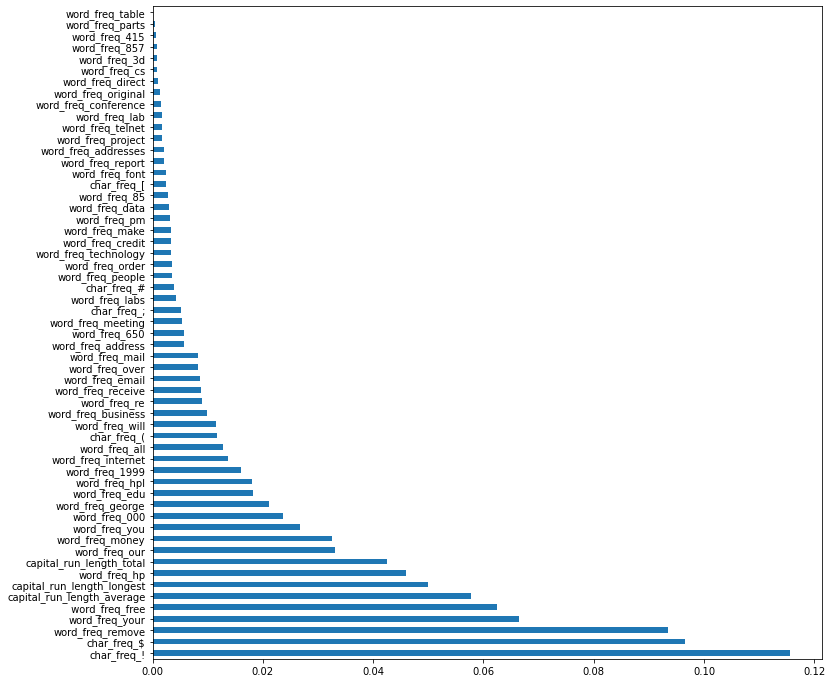

In [17]:
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(12, 12))
feat_importances.nlargest(57).plot(kind='barh')
plt.show()


  
# changing the size of figure to 2X2
